⭐ STEP 1 — EDA

1.1 Load Data

In [1]:
import pandas as pd
df = pd.read_excel("data/simple_cleaned_dataset.xlsx")

1.2 Basic Overview

In [2]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                9990 non-null   int64         
 1   supplier_id             9990 non-null   int64         
 2   supplier_rating         9990 non-null   float64       
 3   supplier_lead_time      9990 non-null   int64         
 4   order_date              9990 non-null   datetime64[ns]
 5   promised_delivery_date  9990 non-null   datetime64[ns]
 6   actual_delivery_date    9990 non-null   datetime64[ns]
 7   shipment_mode           9990 non-null   object        
 8   shipping_distance_km    9990 non-null   int64         
 9   order_quantity          9990 non-null   int64         
 10  unit_price              9990 non-null   float64       
 11  total_order_value       9990 non-null   float64       
 12  weather_condition       9990 non-null   object  

order_id                     0
supplier_id                  0
supplier_rating              0
supplier_lead_time           0
order_date                   0
promised_delivery_date       0
actual_delivery_date         0
shipment_mode                0
shipping_distance_km         0
order_quantity               0
unit_price                   0
total_order_value            0
weather_condition            0
region                       0
holiday_period               0
previous_on_time_rate        0
carrier_name                 0
delayed_reason_code       1997
on_time_delivery             0
dtype: int64

1.3 Target Variable Distribution

In [ ]:
df['on_time_delivery'].value_counts()

on_time_delivery
0    7190
1    2800
Name: count, dtype: int64

1.4 Numeric Distributions

array([[<Axes: title={'center': 'order_id'}>,
        <Axes: title={'center': 'supplier_id'}>,
        <Axes: title={'center': 'supplier_rating'}>,
        <Axes: title={'center': 'supplier_lead_time'}>],
       [<Axes: title={'center': 'order_date'}>,
        <Axes: title={'center': 'promised_delivery_date'}>,
        <Axes: title={'center': 'actual_delivery_date'}>,
        <Axes: title={'center': 'shipping_distance_km'}>],
       [<Axes: title={'center': 'order_quantity'}>,
        <Axes: title={'center': 'unit_price'}>,
        <Axes: title={'center': 'total_order_value'}>,
        <Axes: title={'center': 'previous_on_time_rate'}>],
       [<Axes: title={'center': 'on_time_delivery'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

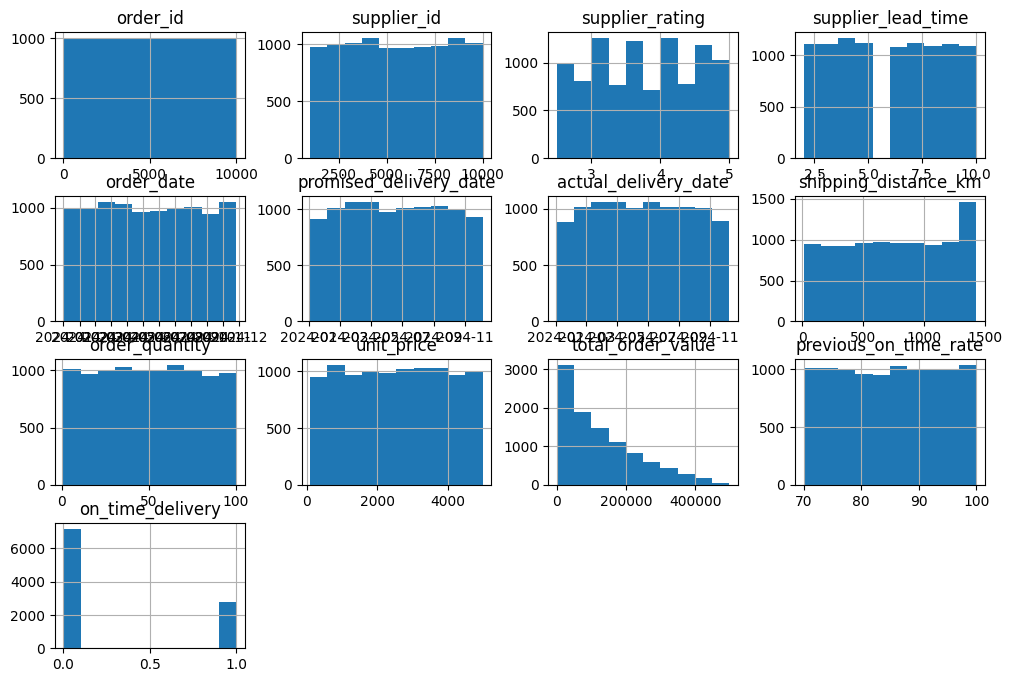

In [ ]:
df.hist(figsize=(12,8))

1.5 Correlation Heatmap

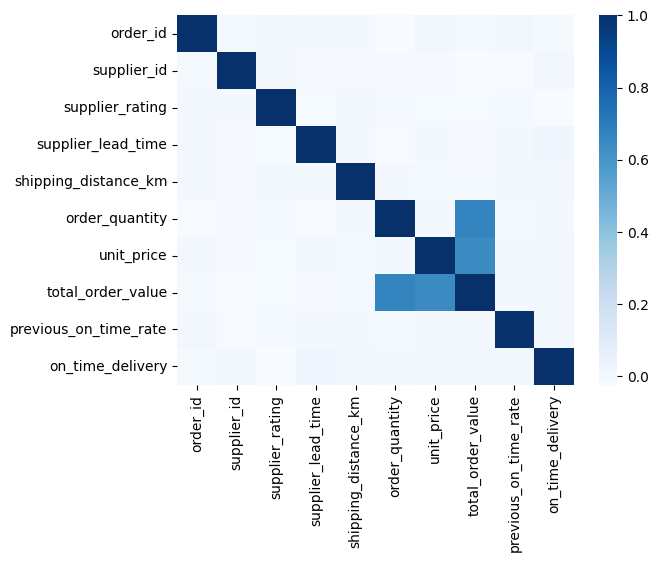

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=False, cmap='Blues')
plt.show()



1.6 Key Relationship Plots

<Axes: xlabel='on_time_delivery', ylabel='delivery_days'>

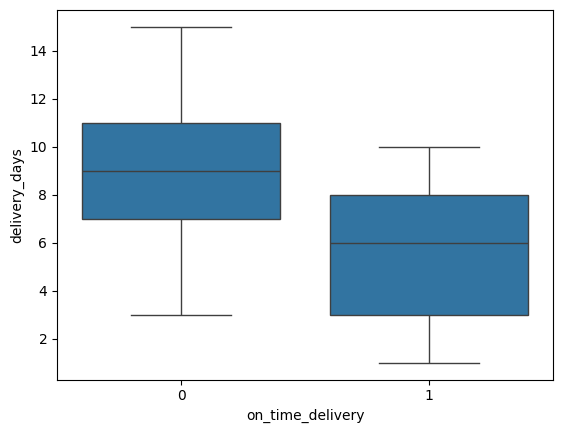

In [6]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['actual_delivery_date'] = pd.to_datetime(df['actual_delivery_date'])
df['delivery_days'] = (df['actual_delivery_date'] - df['order_date']).dt.days
sns.boxplot(x='on_time_delivery', y='delivery_days', data=df)


⭐ STEP 2 — Preprocessing (Only 3 things)

2.1 Encode Categorical Variables

In [ ]:
df = pd.get_dummies(df, drop_first=True)

2.2 Scale Numerical Features

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['delivery_days','order_quantity','shipping_distance_km']
df[num_cols] = scaler.fit_transform(df[num_cols])

2.3 Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('on_time_delivery', axis=1)
y = df['on_time_delivery']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Done.
Preprocessing complete.

⭐ STEP 3 — Feature Engineering

3.1 Delivery Speed Category

In [10]:
df['delivery_speed'] = pd.cut(df['delivery_days'],
                              bins=[-1,2,5,10,100],
                              labels=['Fast','Normal','Slow','Very_Slow'])
df = pd.get_dummies(df, columns=['delivery_speed'], drop_first=True)


3.2 High Distance Flag

In [ ]:
df['long_distance'] = (df['shipping_distance_km'] > 700).astype(int)

3.3 High Supplier Rating Flag

In [ ]:
df['high_rating'] = (df['supplier_rating'] >= 4).astype(int)

📒 Step 4 - Create Sheet


In [13]:
df.to_excel("data/processed_milestone2_dataset.xlsx", index=False)
